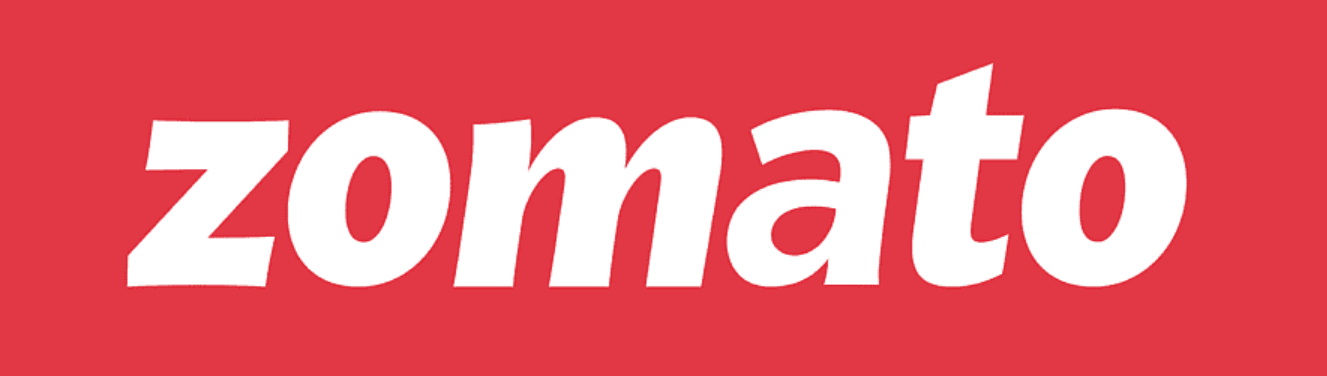

<center>
    <h1><b>Zomato Analytics - Exploratory Data Analysis</b></h1>
</center>

## **Objective**  
Conduct a comprehensive **Exploratory Data Analysis (EDA)** to gain insights into restaurant operations, customer preferences, and dining trends. Identify actionable patterns in restaurant ratings, customer votes, pricing, and other key factors to support business decisions.

---

## **Dataset Overview**  
The dataset provides detailed information about restaurants listed on Zomato, including:  
- **Restaurant Details**: Names, cuisines served, locations, and operating areas.  
- **Customer Feedback**: Ratings, votes, and reviews reflecting customer preferences.  
- **Pricing**: Average cost for two people and related pricing details.  
- **Geographical Insights**: Data segregated by regions, cities, and countries.  
- **Categorical Details**: Type of restaurant (dine-in, delivery, etc.), featured cuisines, and meal types.  

This dataset will be analyzed to uncover trends in pricing, popularity, and customer behavior across various cuisines and regions.


# Step 1 : Import Necessary Libraries and Load the Dataset :->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

data = pd.read_csv("C:/Users/Administrator/Downloads/Indian-Resturants.csv")

# Step 2 : Inspect Data :->

### 2.1) Inspecting the First and Last rows :

In [3]:
data.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [5]:
data.tail(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
211939,3202251,Kali Mirch Cafe And Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/kali-mirch-caf...,"Manu Smriti Complex, Near Navrachna School, GI...",Vadodara,32,Fatehgunj,22.336931,73.192356,...,2,Rs.,"['Dinner', 'Cash', 'Lunch', 'Delivery', 'Indoo...",4.1,Very Good,243,40,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,...,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1
211941,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,...,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211942,3201138,Subway,['Quick Bites'],https://www.zomato.com/vadodara/subway-1-akota...,"G-2, Vedant Platina, Near Cosmos, Akota, Vadodara",Vadodara,32,Akota,22.270027,73.143068,...,2,Rs.,"['Dinner', 'Delivery', 'Credit Card', 'Lunch',...",3.7,Good,128,34,0.0,1,-1
211943,18879846,Freshco's - The Health Cafe,['Café'],https://www.zomato.com/vadodara/freshcos-the-h...,"Shop 7, Ground Floor, Opposite Natubhai Circle...",Vadodara,32,Vadiwadi,22.309935,73.158768,...,2,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.0,Very Good,93,53,0.0,1,-1


### 2.2) Understanding Data types :

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

### 2.3) Summarizing the Data :

In [9]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


### 2.4) Shape and size of the dataset :

In [11]:
data.shape

(211944, 26)

In [13]:
data.size

5510544

### 2.5) Checking for Unique values :

In [15]:
data['city'].nunique()

99

In [17]:
data['city'].unique()

array(['Agra', 'Ahmedabad', 'Gandhinagar', 'Ajmer', 'Alappuzha',
       'Allahabad', 'Amravati', 'Amritsar', 'Aurangabad', 'Bangalore',
       'Bhopal', 'Bhubaneshwar', 'Chandigarh', 'Mohali', 'Panchkula',
       'Zirakpur', 'Nayagaon', 'Chennai', 'Coimbatore', 'Cuttack',
       'Darjeeling', 'Dehradun', 'New Delhi', 'Gurgaon', 'Noida',
       'Faridabad', 'Ghaziabad', 'Greater Noida', 'Dharamshala',
       'Gangtok', 'Goa', 'Gorakhpur', 'Guntur', 'Guwahati', 'Gwalior',
       'Haridwar', 'Hyderabad', 'Secunderabad', 'Indore', 'Jabalpur',
       'Jaipur', 'Jalandhar', 'Jammu', 'Jamnagar', 'Jamshedpur', 'Jhansi',
       'Jodhpur', 'Junagadh', 'Kanpur', 'Kharagpur', 'Kochi', 'Kolhapur',
       'Kolkata', 'Howrah', 'Kota', 'Lucknow', 'Ludhiana', 'Madurai',
       'Manali', 'Mangalore', 'Manipal', 'Udupi', 'Meerut', 'Mumbai',
       'Thane', 'Navi Mumbai', 'Mussoorie', 'Mysore', 'Nagpur',
       'Nainital', 'Nasik', 'Nashik', 'Neemrana', 'Ooty', 'Palakkad',
       'Patiala', 'Patna', 'Pudu

# Step 3 : Data Cleaning :->

### 3.1) Removing Duplicates :

In [19]:
data.drop_duplicates(["res_id"],keep="first",inplace=True)
data.shape

(55568, 26)

**Looks like almost 75% of our data had duplicate rows. Its good that we got that out before getting started. Even though we are left with 1/4th of our original dataset, about 55000+ restaurants is still good enough to perform analysis.**

#### Checking if duplicates are removed :

In [21]:
data.duplicated().sum()

0

### 3.2) Handling Missing Values :

In [23]:
data.isna().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

- We have 5 variables with some kind of missing values. Since zipcode has ~80% missing data, its better to not consider it at all. The other 4 features can be delt with some kind of imputation, but before going through the trouble, its better to look and decide whether they would be beneficial for our analysis or we can simply omit them.

**Omitting not useful features**
- Here we will look at each feature and decide to consider them for our analysis or not:-

1. **res_id** - Unique ID for each restaurant
2.  **name** - Name is useful since we will use it to find top restaurants
3. **establishment** - Let's see what type of values we have in establishment

In [25]:
data["establishment"].unique()

array(["['Quick Bites']", "['Casual Dining']", "['Bakery']", "['Café']",
       "['Dhaba']", "['Bhojanalya']", "['Bar']", "['Sweet Shop']",
       "['Fine Dining']", "['Food Truck']", "['Dessert Parlour']",
       "['Lounge']", "['Pub']", "['Beverage Shop']", "['Kiosk']",
       "['Paan Shop']", "['Confectionery']", '[]', "['Shack']",
       "['Club']", "['Food Court']", "['Mess']", "['Butcher Shop']",
       "['Microbrewery']", "['Cocktail Bar']", "['Pop up']",
       "['Irani Cafe']"], dtype=object)

In [27]:
print(data["establishment"].unique()[0])
print(type(data["establishment"].unique()[0]))

['Quick Bites']
<class 'str'>


**Establishment looks like a nice feature to perform EDA, however each value has an unwanted square brackets and quotes which seems noisy. Let's remove them with apply( ) function. Also, we have one value which is an empty string, let's rename it to "NA" to avoid confusion.**

In [29]:
# Removing [' '] from each value
print(data["establishment"].unique()[0])
data["establishment"] = data["establishment"].apply(lambda x:x[2:-2])
print(data["establishment"].unique()[0])

# Changing ''  to 'NA'
print(data["establishment"].unique())
data["establishment"] = data["establishment"].apply(lambda x : np.where(x=="", "NA", x))
print(data["establishment"].unique())

['Quick Bites']
Quick Bites
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' '' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']
['Quick Bites' 'Casual Dining' 'Bakery' 'Café' 'Dhaba' 'Bhojanalya' 'Bar'
 'Sweet Shop' 'Fine Dining' 'Food Truck' 'Dessert Parlour' 'Lounge' 'Pub'
 'Beverage Shop' 'Kiosk' 'Paan Shop' 'Confectionery' 'NA' 'Shack' 'Club'
 'Food Court' 'Mess' 'Butcher Shop' 'Microbrewery' 'Cocktail Bar' 'Pop up'
 'Irani Cafe']


1. **url** - URL is the link to restaurant's page which is not useful for us
2. **address** - Not useful since it has long strings and its difficult to classify
3. **city** - Let's check unique cities

# Step 4 : Basic Statistics :->

### 4.1) Average rating :

In [31]:
print(f"Average Rating: {data['aggregate_rating'].mean()}")

Average Rating: 2.958593075151166


### 4.2) Finding Outliers :

In [33]:
# calculate the IQR
Q1=data['aggregate_rating'].quantile(0.25)
Q3=data['aggregate_rating'].quantile(0.75)
IQR=Q3-Q1

# define outlier range 
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

# Identify outliers
outliers = data[(data['aggregate_rating'] < lower_bound) | (data['aggregate_rating'] > upper_bound)]

# Display the calculated values 
print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"lower: {lower_bound}")
print(f"upper: {upper_bound}")

Q1: 2.9
Q3: 3.9
IQR: 1.0
lower: 1.4
upper: 5.4


### 4.3) Checking Distribution of ratings :

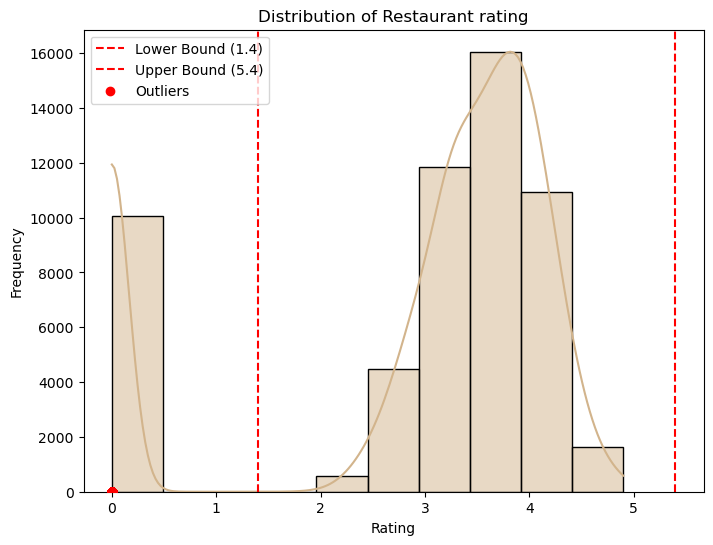

In [35]:
# Create a histogram to visualize the distribution of the data
plt.figure(figsize=(8, 6))
sns.histplot(data['aggregate_rating'], bins=10, kde=True, color='#D2B48C', edgecolor='black')

# Add lines for the lower and upper bounds
plt.axvline(x=lower_bound, color='red', linestyle='--', label=f'Lower Bound ({lower_bound})')
plt.axvline(x=upper_bound, color='red', linestyle='--', label=f'Upper Bound ({upper_bound})')

# Highlight the outliers
outlier_values = data[(data['aggregate_rating'] < lower_bound) | (data['aggregate_rating'] > upper_bound)]['aggregate_rating']
plt.scatter(outlier_values, np.zeros_like(outlier_values), color='red', label='Outliers', zorder=5)

# Add title and labels
plt.title('Distribution of Restaurant rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

#### **Observations:**
- The distribution of restaurant ratings is right-skewed, with a majority of ratings falling between 3 and 4. There are also some outliers below the lower bound, indicating very low ratings.
#### **Recommendations:**
- **Focus on High-Rated Restaurants:** Prioritize marketing and promotions for restaurants with high ratings (4 and above) to attract more customers.
- **Address Low-Rated Restaurants:** Identify the reasons for low ratings and take corrective actions, such as improving service quality, food quality, or ambiance.
- **Customer Feedback Analysis:** Regularly analyze customer feedback and reviews to identify areas for improvement and implement necessary changes.

### 4.4) Boxplot of rating :

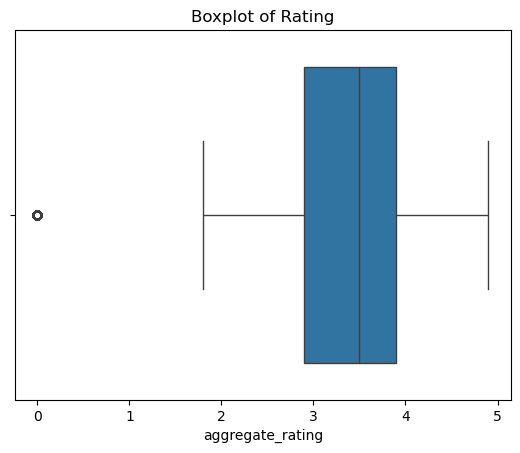

In [37]:
sns.boxplot(x='aggregate_rating', data=data)
plt.title('Boxplot of Rating')
plt.show()

# Calculate quartiles
Q1 = data['aggregate_rating'].quantile(0.25)
Q3 = data['aggregate_rating'].quantile(0.75)
IQR = Q3 - Q1

# Define threshold for outliers
threshold = 1.5 * IQR

# Identify outliers
outliers = data[(data['aggregate_rating'] < Q1 - threshold) | (data['aggregate_rating'] > Q3 + threshold)]

### 4.5) Boxplot of aggregate_rating after Outlier Treatment :

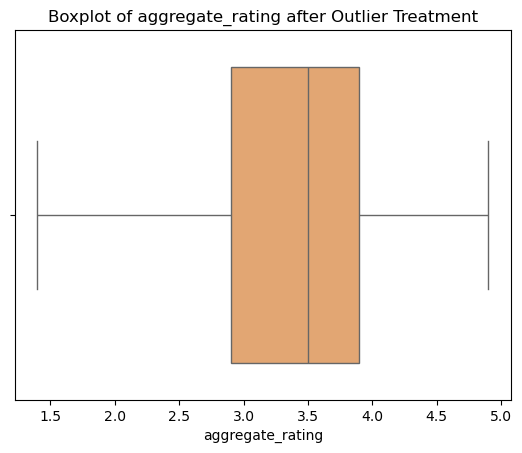

In [39]:
# Handle the outliers at the threshold values
data['aggregate_rating'] = data['aggregate_rating'].clip(lower=Q1 - threshold, upper=Q3 + threshold)

# Recheck the boxplot
sns.boxplot(x='aggregate_rating', data=data,color='#F4A460')
plt.title('Boxplot of aggregate_rating after Outlier Treatment')
plt.show()

# Step 5 : Location Analysis :->

### 5.1) Cities with the highest concentration of restaurants :

In [41]:
data['city'].value_counts()

city
Bangalore        2247
Mumbai           2022
Pune             1843
Chennai          1827
New Delhi        1704
                 ... 
Udupi              60
Howrah             50
Neemrana           26
Greater Noida      21
Nayagaon           15
Name: count, Length: 99, dtype: int64

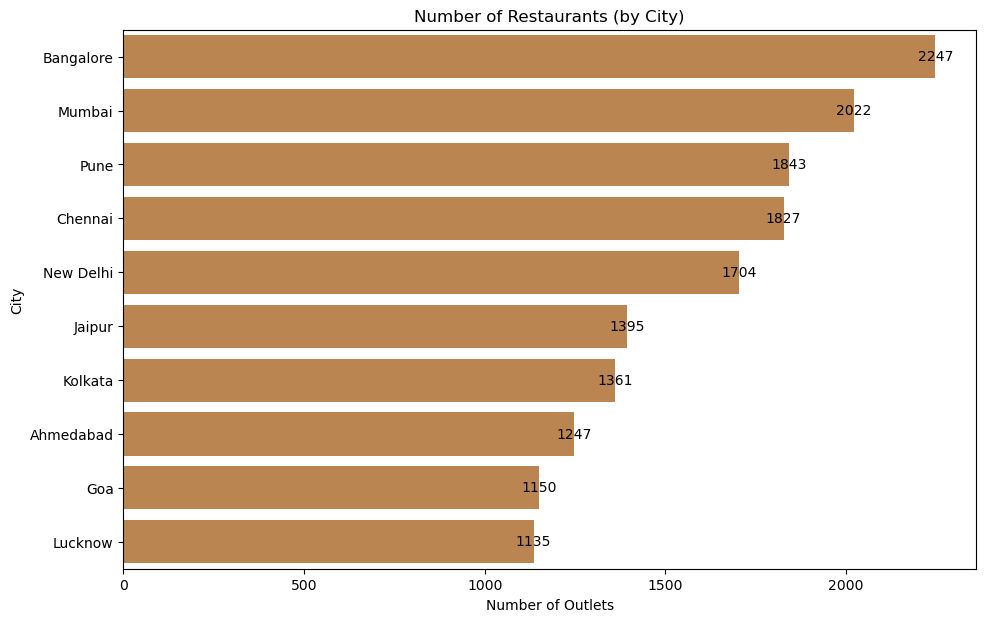

In [43]:
# Calculate the value counts for the top 10 cities
city_counts = data.groupby("city").count()["res_id"].sort_values(ascending=False).head(10)

# Prepare data for plotting
height = pd.Series(city_counts.values)  # Number of restaurants
bars = city_counts.index  # City names

# Plotting with Seaborn
plt.figure(figsize=(11, 7))
sns.barplot(x=height, y=bars, color="#CD853F")  # Horizontal bar plot
plt.xlabel("Number of Outlets")
plt.ylabel("City")
plt.title("Number of Restaurants (by City)")

# Annotate bars with counts
for i in range(len(height)): 
    plt.text(height[i], i, str(height[i]), color='black', ha="center", va="center")

plt.show()

### Key Insights: Distribution of Restaurants by City  

1. **Bangalore Leads the Pack**: With 2,247 restaurants, Bangalore emerges as the top city, showcasing its vibrant food culture and high demand for dining options.  

2. **Mumbai’s Competitive Edge**: Mumbai, with 2,022 restaurants, secures the second spot, reflecting its diverse culinary scene and a strong market for food businesses.  

3. **Pune and Chennai in Close Competition**: Pune (1,843) and Chennai (1,827) are nearly tied for third and fourth places, highlighting their growing prominence as food destinations.  

4. **Capital City's Moderate Presence**: New Delhi, despite being the national capital, ranks fifth with 1,704 restaurants, indicating room for expansion in its restaurant ecosystem.  

5. **Emerging Markets**: Cities like Jaipur (1,395), Kolkata (1,361), Ahmedabad (1,247), Goa (1,150), and Lucknow (1,135) show significant but comparatively smaller restaurant markets, reflecting potential growth opportunities.  
  

 **Insights on Trends**:  
   - The data suggests a strong concentration of restaurants in metropolitan cities, driven by population density and high disposable incomes.  
   - Tier-2 cities, like Ahmedabad, Goa, and Lucknow, while smaller in numbers, are key areas to watch as they continue to develop their dining landscapes.

### 5.2) Visualize restaurant rating by city :

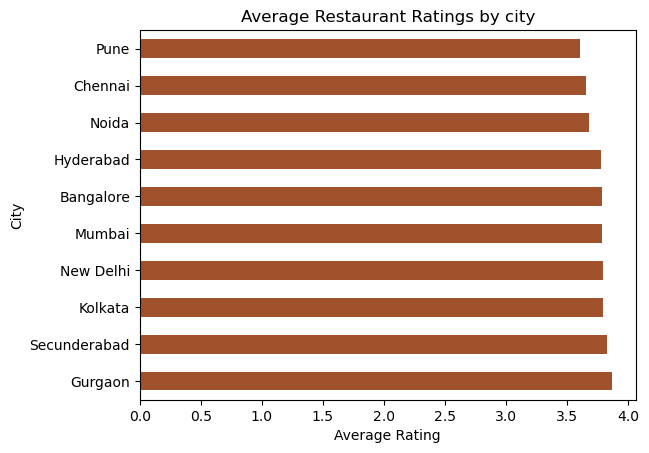

In [45]:
city_counts = data['city'].value_counts()
city_ratings = data.groupby('city')['aggregate_rating'].mean()
city_ratings.sort_values(ascending=False).head(10).plot(kind='barh',color='#A0522D')
plt.title('Average Restaurant Ratings by city')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

#### **Observations:**
- The average restaurant ratings are relatively high across all cities, with Gurgaon having the highest average rating. There is not a significant difference in ratings between cities.
#### **Recommendations:**
- **Maintain High Standards:** Zomato should continue to maintain high standards for restaurant partners to ensure consistent quality across all cities.
- **Targeted Marketing:** While all cities have high ratings, targeted marketing campaigns can be implemented to highlight specific cuisines, restaurants, or promotions in each city to drive sales.
- **Customer Feedback Analysis:** Regularly analyze customer feedback and reviews to identify areas for improvement and implement necessary changes in specific cities.

# Step 6 : Cuisine Analysis :->

### 6.1) Handle missing values in the 'cuisines' column by using forward fill :

In [47]:
data['cuisines'] = data['cuisines'].ffill()

### 6.2) Checking most popular cuisines among the listed restaurants :

In [49]:
cuisine_counts = data['cuisines'].value_counts()
cuisine_counts.head(10)

cuisines
North Indian             4343
Fast Food                2065
North Indian, Chinese    1731
Bakery                   1593
South Indian             1515
Street Food              1190
Cafe                     1098
Mithai                   1031
Desserts                  926
Bakery, Desserts          838
Name: count, dtype: int64

### 6.3) Correlation between the variety of cuisines offered and restaurant ratings :

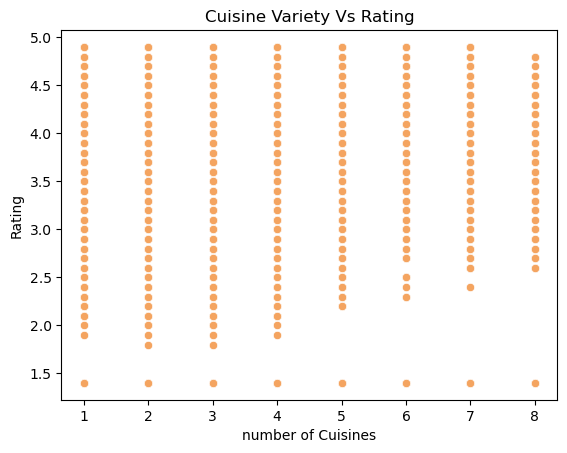

In [51]:
data['new_cuisines'] = data['cuisines'].apply(lambda x: len(x.split(',')))
sns.scatterplot(x='new_cuisines',y='aggregate_rating',data=data,color='#F4A460')
plt.title('Cuisine Variety Vs Rating')
plt.xlabel('number of Cuisines')
plt.ylabel('Rating')
plt.show()

#### **Observations:**
- There doesn't seem to be a strong correlation between the number of cuisines offered by a restaurant and its rating.
-  Restaurants with a wide range of cuisines (up to 8) have similar ratings to those with fewer cuisines.
#### **Recommendations:**
- Focus on Quality Over Quantity: Rather than focusing on offering a wide variety of cuisines, restaurants should prioritize offering high-quality dishes within a few core cuisines.
- **Customer Feedback Analysis:** Analyze customer feedback to understand the most popular cuisines and dishes, and focus on improving these offerings.
- **Unique Selling Proposition:** Restaurants should aim to differentiate themselves by offering unique dishes or dining experiences, rather than simply focusing on the number of cuisines.
- **Efficient Operations:** Offering a wide variety of cuisines can increase operational complexity and costs. Restaurants should focus on streamlining operations and optimizing their menu to maintain quality and profitability.

### 6.4) Number of Restaurants by Cuisine :

In [53]:
cuisiness = data['cuisines']
# Calculate the top 5 cuisines
cuisines_count = cuisiness.value_counts()[:5].reset_index()
cuisines_count.columns = ['cuisine', 'count']
cuisines_count

,cuisine,count
0,North Indian,4343
1,Fast Food,2065
2,"North Indian, Chinese",1731
3,Bakery,1593
4,South Indian,1515


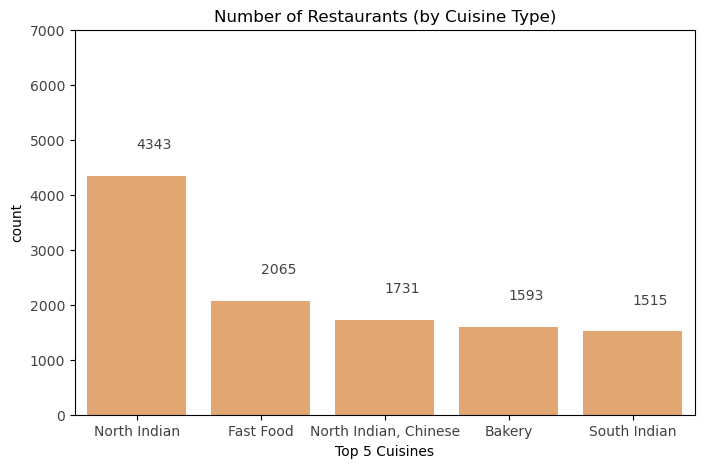

In [55]:
# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='cuisine', y='count', data=cuisines_count,color='#F4A460')
plt.xticks(color="#424242")
plt.yticks(range(0, 8000, 1000), color="#424242")
plt.xlabel("Top 5 Cuisines")
plt.title("Number of Restaurants (by Cuisine Type)")

# Adding labels on bars
for index, value in enumerate(cuisines_count['count']):
    plt.text(index, value + 500, str(value), color='#424242')

plt.show()

### Key Insights: Distribution of Restaurants by Cuisine Type  

1. **North Indian Cuisine Dominates**:  
   - With 4,343 restaurants offering North Indian cuisine, it significantly surpasses other cuisine types, indicating its high popularity and demand across cities.  

2. **Fast Food on the Rise**:  
   - Fast Food takes the second spot with 2,065 outlets, showcasing the growing influence of quick and convenient dining options, especially among younger demographics.  

3. **Fusion Appeal of North Indian and Chinese**:  
   - The combination of North Indian and Chinese cuisines, offered by 1,731 restaurants, highlights the growing demand for diverse and fusion dining experiences.  

4. **Bakery and South Indian are Close Competitors**:  
   - Bakery (1,593) and South Indian (1,515) cuisines have a strong presence, indicating their consistent appeal as comfort food and traditional staples, respectively.   

 **Insights on Trends**:  
   - **Cultural Significance**: The dominance of North Indian cuisine reflects its widespread acceptance and cultural roots in the Indian dining space.  
   - **Fusion Opportunities**: The demand for mixed cuisines like North Indian and Chinese points toward opportunities for innovative food combinations.  
   - **Changing Preferences**: The growth in Fast Food restaurants indicates shifting consumer preferences toward convenience-driven dining.  

# Step 7 : Price Range and Rating :->

### 7.1) Price Range Count :

In [57]:
# Calculate the value counts for price ranges
pr_count = data.groupby("price_range").count()["name"].reset_index()
pr_count.columns = ['price_range', 'count']

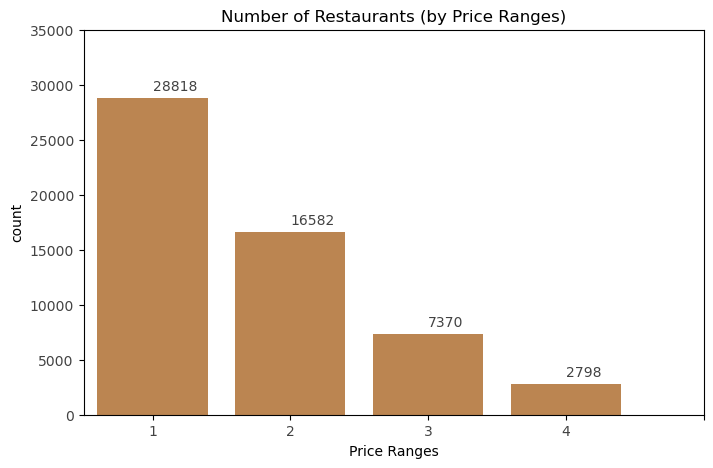

In [59]:
# Plotting with Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='price_range', y='count', data=pr_count,color="#CD853F")
plt.xticks(range(0, 5), color="#424242")
plt.yticks(range(0, 40000, 5000), color="#424242")
plt.xlabel("Price Ranges")
plt.title("Number of Restaurants (by Price Ranges)")

# Adding labels on bars
for index, value in enumerate(pr_count['count']):
    plt.text(index, value + 700, str(value), color='#424242')

plt.show()

**Price range chart supports our previous observation from the Average cost chart. Number of restaurant decreases with increase in price range**

### 7.2) Relationship Between Price Range and Ratings :

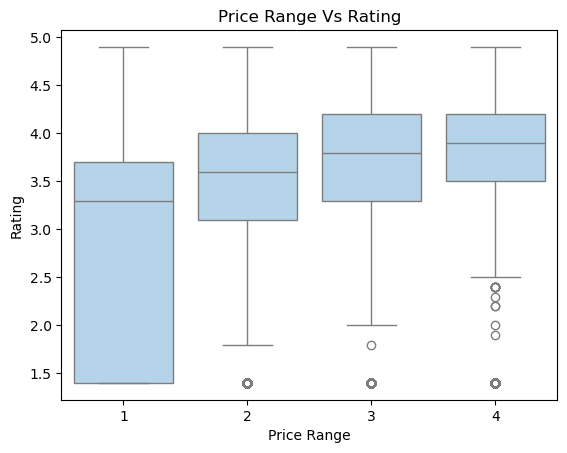

In [61]:
sns.boxplot(data=data,x='price_range',y='aggregate_rating',color="#AED6F1")
plt.title('Price Range Vs Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()

**Now, it is clear. The higher the price a restaurant charges, more services they provide and hence more chances of getting good ratings from their customers.**

### 7.3) Calculating the average cost for two people in different price categories :

In [63]:
price_rating = data.groupby('price_range')['average_cost_for_two'].mean()
price_rating

price_range
1     216.662156
2     522.320528
3    1091.425916
4    2288.293781
Name: average_cost_for_two, dtype: float64

# Step 8 : Online Orders and Table Booking :->

### 8.1) Impact of Online Order Availability on Restaurant Ratings :

#### Categorizing Restaurants by Online Order Availability: 

In [65]:
delivery_group = data.groupby('delivery')['aggregate_rating'].median()
delivery_group

delivery
-1    3.3
 0    3.3
 1    3.7
Name: aggregate_rating, dtype: float64

**If we want to check if the difference in ratings between the two categories (delivery vs. no delivery) is statistically significant, you can perform a t-test.**

In [67]:
# Split the dataset into two groups: one with delivery, one without
delivery_yes = data[data['delivery'] == 1]['aggregate_rating'].dropna()
delivery_no = data[data['delivery'] == 0]['aggregate_rating'].dropna()

# Perform a t-test
t_stat, p_val = ttest_ind(delivery_yes, delivery_no)

print(f"T-statistic: {t_stat}, P-value: {p_val}")

T-statistic: 11.260775585237498, P-value: 2.561640149078708e-29


**A p-value below 0.05 would indicate a statistically significant difference in ratings between the two groups.**

### 8.2) Visualize the Impact on Ratings :

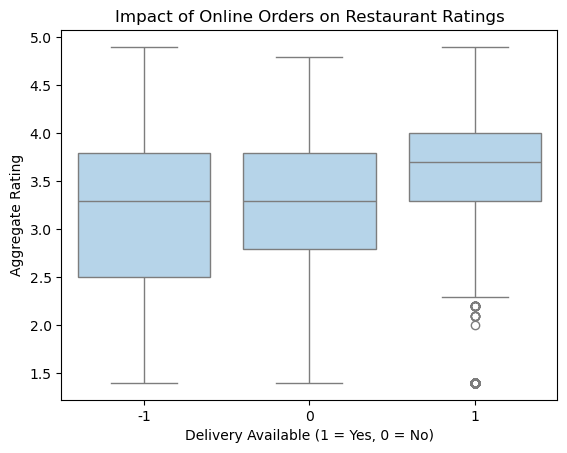

In [69]:
sns.boxplot(x='delivery', y='aggregate_rating', data=data,color='#AED6F1')
plt.title('Impact of Online Orders on Restaurant Ratings')
plt.xlabel('Delivery Available (1 = Yes, 0 = No)')
plt.ylabel('Aggregate Rating')
plt.show()

**This boxplot will show you if there’s a noticeable difference in ratings based on whether a restaurant offers delivery.**

### 8.3) Number of Restaurants Offering Table Booking :

In [71]:
data['opentable_support'].value_counts()

opentable_support
0.0    55556
Name: count, dtype: int64

#  Step 9 : Top Restaurant Chains :->

### 9.1) Checking number of outlets for each restaurant to see top chains :

In [73]:
restaurant_counts = data['name'].value_counts()
top_chains = restaurant_counts.head(10)
top_chains

name
Domino's Pizza     399
Cafe Coffee Day    315
KFC                204
Baskin Robbins     202
Keventers          189
Subway             178
McDonald's         130
Pizza Hut          125
Barbeque Nation    112
Burger King        110
Name: count, dtype: int64

### 9.2) Top Restaurant Chains Based on Number of Outlets :

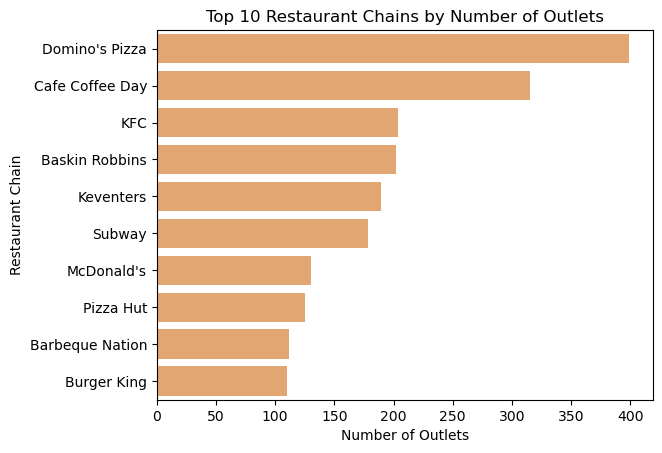

In [75]:
sns.barplot(x=top_chains.values,y=top_chains.index,color='#F4A460')
plt.title('Top 10 Restaurant Chains by Number of Outlets')
plt.xlabel('Number of Outlets')
plt.ylabel('Restaurant Chain')
plt.show()

#### **Observations:**
- Domino's Pizza is the clear leader in terms of the number of outlets, followed by Cafe Coffee Day.
- KFC, Subway, and Keventers also have a significant number of outlets.
#### **Recommendations:**
- **Strategic Partnerships:** Zomato can partner with these top restaurant chains to offer exclusive deals, discounts, and loyalty programs to customers.
- **Data-Driven Insights:** Utilize data analytics to identify high-performing outlets and optimize marketing efforts accordingly.
- **Geographic Expansion:** Encourage these chains to expand their presence in areas with high demand and limited competition.

### 9.3) Exploring the Ratings of the Top Chains :

### **Average ratings** -

In [77]:
avg_ratings = data.groupby('name')['aggregate_rating'].mean()
avg_ratings

name
# Wednesday                            3.5
#1, Culinary Avenue - The Red Maple    3.9
#788 Avenue                            3.9
#BC                                    4.2
#BEiR                                  4.1
                                      ... 
 Food Street - Veg                     2.9
ट 4 Tasty                              3.7
द Vege टेबल                            4.2
स्पेस Bar                              4.3
ह-tea The Tea Hut                      4.2
Name: aggregate_rating, Length: 41100, dtype: float64

### **Filtering for top chains**

In [79]:
top_chains_rating = avg_ratings[top_chains.index]
top_chains_rating
# Sort the average ratings in ascending order
top_chains_ratings = top_chains_rating.sort_values(ascending=False)
top_chains_ratings

name
Barbeque Nation    4.411607
Burger King        3.902727
KFC                3.843137
McDonald's         3.836154
Keventers          3.731746
Domino's Pizza     3.679449
Subway             3.603371
Pizza Hut          3.507200
Baskin Robbins     3.210891
Cafe Coffee Day    3.048254
Name: aggregate_rating, dtype: float64

### 9.4) Plotting ratings of the Top Chains :

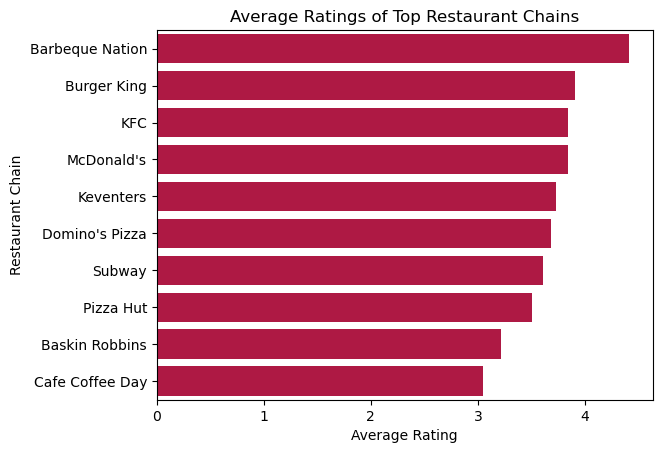

In [81]:
sns.barplot(x=top_chains_ratings.values,y=top_chains_ratings.index,color='#C70039')
plt.title("Average Ratings of Top Restaurant Chains")
plt.xlabel("Average Rating")
plt.ylabel("Restaurant Chain")
plt.show()

### **Observations:**
- Barbeque Nation has the highest average rating among the top 10 restaurant chains.
- Cafe Coffee Day has the lowest average rating.
### **Recommendations:**
- **Highlight High-Rated Chains:** Zomato can promote high-rated chains like Barbeque Nation to attract customers and boost their sales.
- **Identify Areas for Improvement:** Analyze customer feedback and ratings for lower-rated chains like Cafe Coffee Day to identify areas for improvement and suggest corrective actions.
- **Partner with Top Chains:** Zomato can partner with top-rated chains to offer exclusive deals and promotions to customers.

# Step 10 : Restaurant Features :->

### 10.1) Identify and Extract Specific Features :

In [83]:
# Define a list of features to check for in the 'highlights' column
features = ['Wi-Fi', 'Alcohol', 'Outdoor Seating', 'Smoking Area', 'Pet Friendly', 'Parking']

# Create new columns for each feature indicating whether the feature is available (1) or not (0)
for feature in features:
    data[feature] = data['highlights'].apply(lambda x: 1 if feature in x else 0)

# Check if the new columns were created successfully
(data[features].head(10))

,Wi-Fi,Alcohol,Outdoor Seating,Smoking Area,Pet Friendly,Parking
0,0,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,1,0,0,0
3,0,0,0,1,0,0
4,0,1,1,1,0,0
5,0,1,0,0,0,1
6,0,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,0,0
9,0,1,1,0,0,0


### 10.2) Distribution of Restaurants Based on Features :

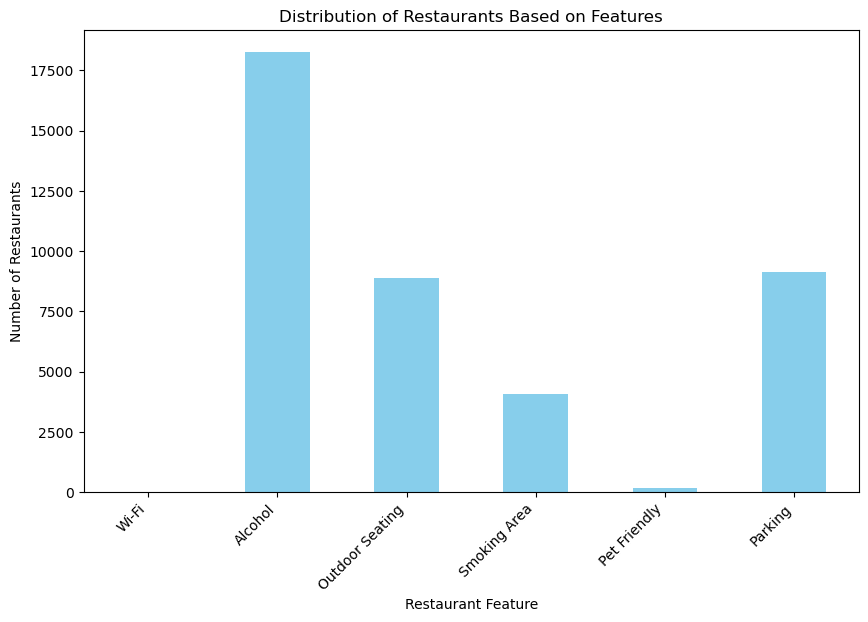

In [85]:
feature_counts = data[features].sum()
plt.figure(figsize=(10, 6))
feature_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Restaurants Based on Features')
plt.xlabel('Restaurant Feature')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Observations:**
- Alcohol is the most common feature among restaurants.
- Pet-Friendly and Smoking Area are the least common features.
#### **Recommendations:**
- **Highlight Popular Features:** Promote restaurants with Wi-Fi and alcohol availability to attract customers.
- **Target Specific Segments:** Target specific customer segments by highlighting restaurants with features like pet-friendly or outdoor seating.
- **Partner with Venues:** Partner with venues that offer unique features like smoking areas or parking to attract a wider customer base.

### 10.3) Correlation Between Features and Ratings :

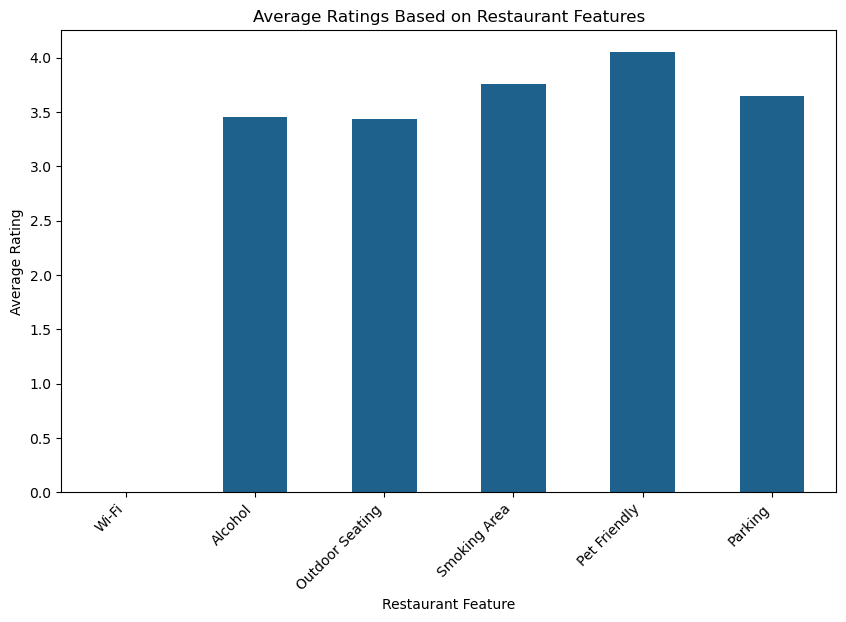

In [87]:
# Calculate average rating for each feature (only for rows where the feature is present)
feature_ratings = {}
for feature in features:
    avg_rating = data[data[feature] == 1]['aggregate_rating'].mean()
    feature_ratings[feature] = avg_rating

# Convert the dictionary into a pandas series for easier visualization
feature_ratings_series = pd.Series(feature_ratings)

# Plot average ratings based on features
plt.figure(figsize=(10, 6))
feature_ratings_series.plot(kind='bar', color='#1F618D')
plt.title('Average Ratings Based on Restaurant Features')
plt.xlabel('Restaurant Feature')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

### 10.4) Statistical Analysis :

                  Wi-Fi   Alcohol  Outdoor Seating  Smoking Area  \
Wi-Fi               NaN       NaN              NaN           NaN   
Alcohol             NaN  1.000000         0.057326      0.097052   
Outdoor Seating     NaN  0.057326         1.000000      0.253597   
Smoking Area        NaN  0.097052         0.253597      1.000000   
Pet Friendly        NaN  0.016057         0.084443      0.093934   
Parking             NaN  0.150822         0.112200      0.244938   
aggregate_rating    NaN  0.174361         0.099283      0.158858   

                  Pet Friendly   Parking  aggregate_rating  
Wi-Fi                      NaN       NaN               NaN  
Alcohol               0.016057  0.150822          0.174361  
Outdoor Seating       0.084443  0.112200          0.099283  
Smoking Area          0.093934  0.244938          0.158858  
Pet Friendly          1.000000  0.042763          0.047354  
Parking               0.042763  1.000000          0.199543  
aggregate_rating      0.0473

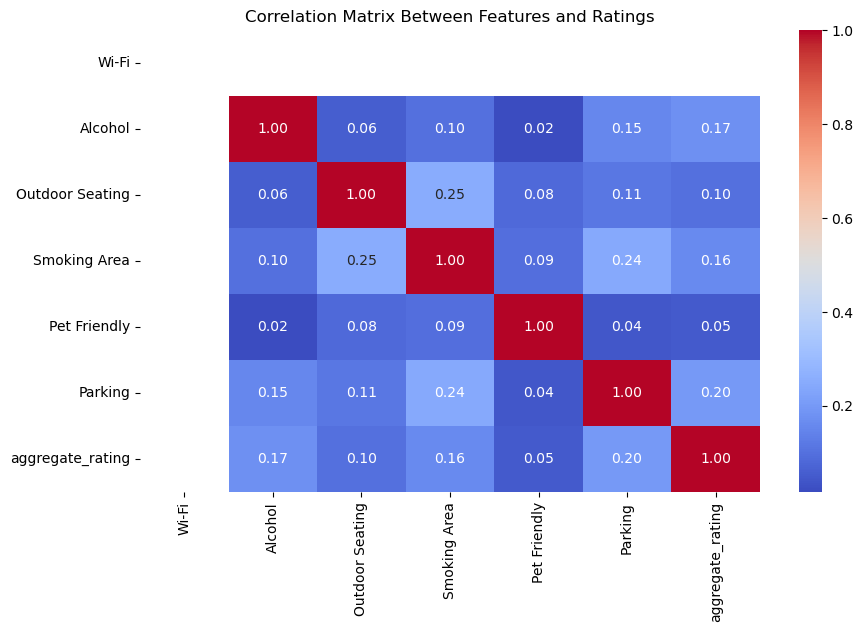

In [89]:
# Correlation analysis between features and aggregate ratings
correlation_data = data[features + ['aggregate_rating']]
correlation_matrix = correlation_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Features and Ratings')
plt.show()

#### **Observersation:**

- Identify the most common features (e.g., Wi-Fi, Alcohol) across restaurants in your dataset.
- Visualize the distribution of restaurants with specific features.
- Analyze how certain features (like Wi-Fi or Alcohol) correlate with higher ratings.
- Perform a statistical correlation analysis to see if the presence of specific features significantly impacts the aggregate ratings.

# Step 13 : Word Cloud for Reviews :->

### 13.1) First Let's see how the ratings are distributes :

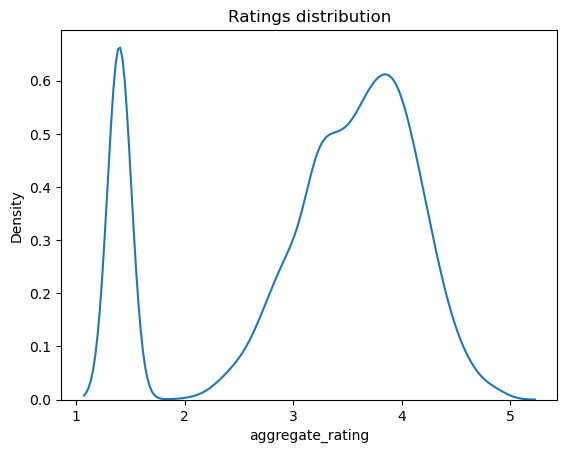

In [91]:
sns.kdeplot(data['aggregate_rating'])
plt.title("Ratings distribution")
plt.show()

#### **Observations:**
- The distribution of restaurant ratings is bimodal, with peaks around 1.5 and 4. This indicates that a significant proportion of restaurants either have very low ratings or very high ratings.
#### **Recommendations:**
- **Focus on High-Rated Restaurants:** Prioritize marketing and promotions for restaurants with high ratings (4 and above) to attract more customers.
- **Address Low-Rated Restaurants:** Identify the reasons for low ratings and take corrective actions, such as improving service quality, food quality, or ambiance.
- **Customer Feedback Analysis:** Regularly analyze customer feedback and reviews to identify areas for improvement and implement necessary changes.

In [93]:
data['rating_text'].value_counts()

rating_text
Average          16313
Good             16019
Very Good        10905
Not rated        10058
Excellent         1609
Poor               575
Sangat Baik          9
Çok iyi              8
Bom                  7
Muito Bom            5
İyi                  5
Baik                 5
Velmi dobré          5
Buono                4
Dobré                4
Promedio             4
Skvělá volba         4
Průměr               4
Excelente            3
Muy Bueno            3
Skvělé               3
Vynikajúce           2
Terbaik              2
Veľmi dobré          2
Bardzo dobrze        2
Muito bom            1
Ortalama             1
Scarso               1
Bueno                1
Harika               1
Eccellente           1
Média                1
Dobrze               1
Name: count, dtype: int64

### 13.2) Replace specific rating texts :

In [95]:
data['rating_text']=data['rating_text'].replace({'Çok iyi' : 'Good', 'Sangat Baik' : 'Average', 'Muito Bom' : 'Very Good',
                                             'Excelente' : 'Excellent', 'Muy Bueno' : 'Excellent' ,'Excelente' : 'Excellent', 'Muy Bueno' : 'Poor',
                                             'Bardzo dobrze' : 'Good', 'Bom' : 'Average' , 'Baik': 'Excellent', 'Skvělé' : 'Not rated','Velmi dobré' : 'Not rated',
                                             'Buono' : 'Excellent', 'Dobrze' : 'Poor', 'Wybitnie' : 'Not rated', 'Eccellente' : 'Very Good' , 'Vynikajúce' : 'Average',
                                             'Průměr' : 'Poor', 'Média' : 'Good','Promedio':'Not rated','Muito bom' : 'Excellent','Ortalama': 'Poor', 'Średnio' : 'Good',
                                             'Priemer' : 'Good','Media' : 'Average','Biasa' : 'Excellent','Scarso': 'Poor','İyi' : 'Excellent', 'Harika' : 'Very Good',
                                             'Ottimo' : 'Average','Veľmi dobré': 'Excellent','Terbaik' : 'Excellent', 'Skvělá volba' : 'Good', 'Dobré' : 'Very Good',
                                             'Bueno' : 'Good'})
data['rating_text'].value_counts()

rating_text
Average      16331
Good         16035
Very Good    10916
Not rated    10070
Excellent     1631
Poor           585
Name: count, dtype: int64

### 13.3) Plotting rating text :

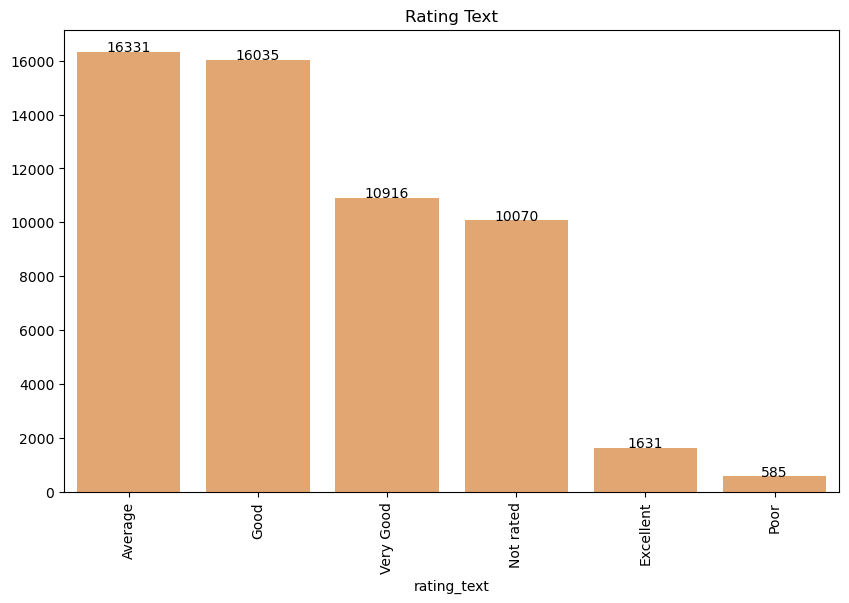

In [97]:
# Calculate the value counts
high = data['rating_text'].value_counts()

# Plotting the barplot
plt.figure(figsize=(10, 6))
g = sns.barplot(x=high.index, y=high.values,color='#F4A460')
plt.xticks(rotation=90)
plt.title("Rating Text")

# Adding labels on bars
for index, value in enumerate(high.values):
    plt.text(index, value + 0.01, str(value), ha='center')

plt.show()

#### **Observations:**
- The majority of customers have rated the restaurants as "Good" or "Average".
- A significant proportion of customers have not rated the restaurants.
#### Recommendations:
- **Encourage Customer Feedback:** Implement strategies to encourage more customers to leave ratings and reviews, such as offering incentives or making the rating process easier.
- **Focus on Improving "Good" Ratings:** Identify areas where "Good" rated restaurants can improve to reach "Very Good" or "Excellent" ratings. This could include enhancing food quality, service, or ambiance.
- **Address "Poor" Ratings:** Analyze the reasons for poor ratings and take corrective actions to improve customer satisfaction and prevent future negative reviews.

### 13.4) Word Cloud :

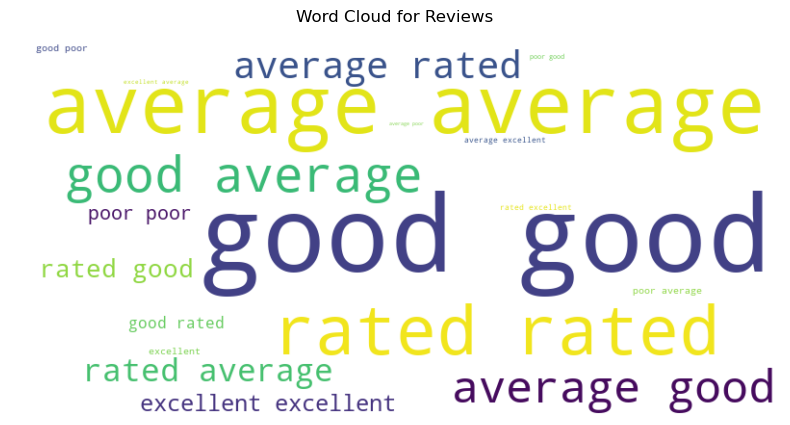

In [99]:
import string 
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming data['rating_text'] contains the reviews
reviews = data['rating_text']

# Create a function to clean and preprocess the text
def clean_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Clean the reviews text
cleaned_reviews = reviews.apply(clean_text)

# Join all reviews into a single string
all_reviews = ' '.join(cleaned_reviews)

# Generate a Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews')
plt.show()

<center>
    <h1><b>Conclusion</b></h1>
</center>

The analysis of the Zomato dataset has provided valuable insights into restaurant characteristics and customer preferences. Key findings include:

### **1. Cuisine and Popularity Trends:**
- North Indian, Chinese, and Italian cuisines are the most frequently offered and preferred by customers.
- Restaurant types like Quick Bites and Casual Dining dominate the market.

### **2. Pricing and Rating Patterns:**
- Higher-rated restaurants tend to have higher average costs for two, indicating a possible link between quality and price.
- However, a significant number of affordable restaurants also maintain competitive ratings, catering to budget-conscious diners.

### **3. Customer Engagement:**
- The majority of restaurants do not offer table booking options, indicating a preference for walk-ins or delivery services.
- The number of votes shows a positive correlation with restaurant ratings, reflecting customer engagement and satisfaction.

### **4. Geographic Insights:**
- Certain areas, such as **Koramangala** and **Indiranagar**, have the highest concentration of top-rated and popular restaurants, serving as hubs for food enthusiasts.

### **5. Outlier Observations:**
- Extreme values in ratings, votes, and costs were addressed, highlighting the need to clean and normalize data for accurate insights.

---

### **Business Implications**
- **For Restaurant Owners:** Offering table booking and competitive pricing could attract a broader customer base while maintaining high service quality.
- **For Zomato:** Partnering with restaurants in high-demand areas and emphasizing customer feedback mechanisms can further enhance platform trust and engagement.

This analysis forms the foundation for deeper studies, such as customer segmentation or predictive modeling, to guide strategic decisions in the restaurant industry.
